In [1]:
 # Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import seaborn as sns

In [2]:
# Read in csv files
nyc_airbnbs = pd.read_csv("AB_NYC_2019.csv")
nyc_airbnbs.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [3]:
# check N/A values; drop N/A values if necessary 
nyc_airbnbs.isna()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False
48891,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False
48892,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False
48893,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False


In [4]:
# Number of unique neighborhood groups
nyc_airbnbs.neighbourhood_group.nunique()

5

In [5]:
# Replacng all null values in "reviews_per_month" with 0
nyc_airbnbs.fillna({'reviews_per_month':0}, inplace=True)
nyc_airbnbs.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                     0
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [6]:
# What are the neighbourhood groups listed?
nyc_airbnbs.neighbourhood_group.unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [7]:
# How many listings are in each neighborhood groups?
nyc_airbnbs.neighbourhood_group.value_counts()

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

In [9]:
# How many listings are in each neighborhood groups?
nyc_airbnbs.neighbourhood_group.value_counts()

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

Text(0, 0.5, '')

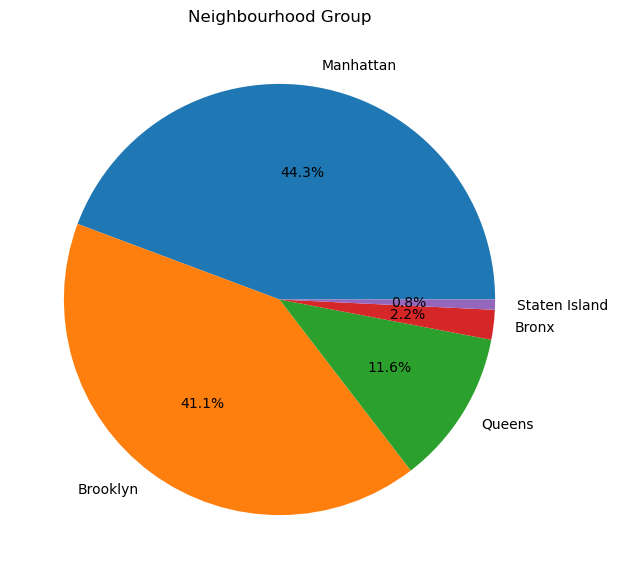

In [10]:
pieplot1 = nyc_airbnbs.neighbourhood_group.value_counts().plot.pie(title='Neighbourhood Group',
                                               figsize=(7,7),
                                              autopct='%1.1f%%')
pieplot1.set_ylabel(None)


In [11]:
# Number of unique neighborhoods
nyc_airbnbs.neighbourhood.nunique()

221

In [12]:
# What are the neighborhoods listed?
nyc_airbnbs.neighbourhood.unique()

array(['Kensington', 'Midtown', 'Harlem', 'Clinton Hill', 'East Harlem',
       'Murray Hill', 'Bedford-Stuyvesant', "Hell's Kitchen",
       'Upper West Side', 'Chinatown', 'South Slope', 'West Village',
       'Williamsburg', 'Fort Greene', 'Chelsea', 'Crown Heights',
       'Park Slope', 'Windsor Terrace', 'Inwood', 'East Village',
       'Greenpoint', 'Bushwick', 'Flatbush', 'Lower East Side',
       'Prospect-Lefferts Gardens', 'Long Island City', 'Kips Bay',
       'SoHo', 'Upper East Side', 'Prospect Heights',
       'Washington Heights', 'Woodside', 'Brooklyn Heights',
       'Carroll Gardens', 'Gowanus', 'Flatlands', 'Cobble Hill',
       'Flushing', 'Boerum Hill', 'Sunnyside', 'DUMBO', 'St. George',
       'Highbridge', 'Financial District', 'Ridgewood',
       'Morningside Heights', 'Jamaica', 'Middle Village', 'NoHo',
       'Ditmars Steinway', 'Flatiron District', 'Roosevelt Island',
       'Greenwich Village', 'Little Italy', 'East Flatbush',
       'Tompkinsville', 'Asto

In [13]:
# How many listings are in each neighborhoods?
nyc_airbnbs.neighbourhood.value_counts()

Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
                      ... 
Fort Wadsworth           1
Richmondtown             1
New Dorp                 1
Rossville                1
Willowbrook              1
Name: neighbourhood, Length: 221, dtype: int64

In [14]:
# Convert neighbourhood Series to Dataframe
neighbourhood_df = nyc_airbnbs.neighbourhood.value_counts()
neighbourhood_df = neighbourhood_df.to_frame()

# Rename column to count for easier reading
neighbourhood_df = neighbourhood_df.rename(columns={'neighbourhood':'count'})

# Examination
neighbourhood_df.head()

,count
Williamsburg,3920
Bedford-Stuyvesant,3714
Harlem,2658
Bushwick,2465
Upper West Side,1971


In [15]:
# What are the different room types available?
nyc_airbnbs.room_type.unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

In [16]:
# How many listings are under each room type category?
nyc_airbnbs.room_type.value_counts()

Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64

Text(0, 0.5, 'Number of listings')

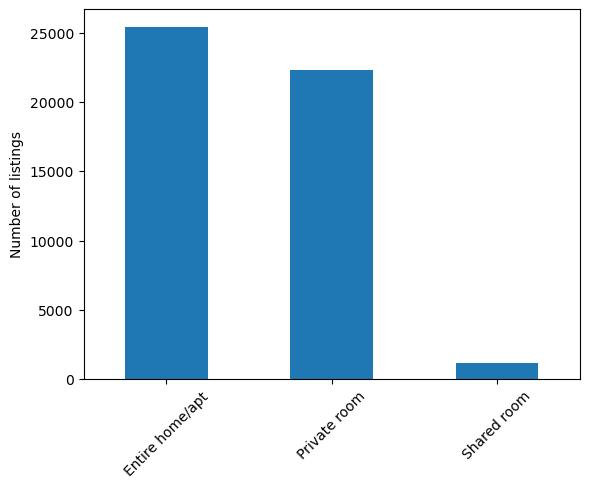

In [17]:
barplot1 = nyc_airbnbs.room_type.value_counts().plot.bar(rot=45)
barplot1.set_ylabel("Number of listings")

In [18]:
neighbourhood_group_room_type = nyc_airbnbs.groupby(['neighbourhood_group','room_type']).size().reset_index()
neighbourhood_group_room_type.columns = ['neighbourhood_group','room_type','count']
neighbourhood_group_room_type

,neighbourhood_group,room_type,count
0,Bronx,Entire home/apt,379
1,Bronx,Private room,652
2,Bronx,Shared room,60
3,Brooklyn,Entire home/apt,9559
4,Brooklyn,Private room,10132
5,Brooklyn,Shared room,413
6,Manhattan,Entire home/apt,13199
7,Manhattan,Private room,7982
8,Manhattan,Shared room,480
9,Queens,Entire home/apt,2096


In [19]:
neighbourhood_group_room_type=neighbourhood_group_room_type.pivot_table(index=['neighbourhood_group'],columns=['room_type'], values=['count'])
neighbourhood_group_room_type

count                         
room_type           Entire home/apt Private room Shared room
neighbourhood_group                                         
Bronx                           379          652          60
Brooklyn                       9559        10132         413
Manhattan                     13199         7982         480
Queens                         2096         3372         198
Staten Island                   176          188           9

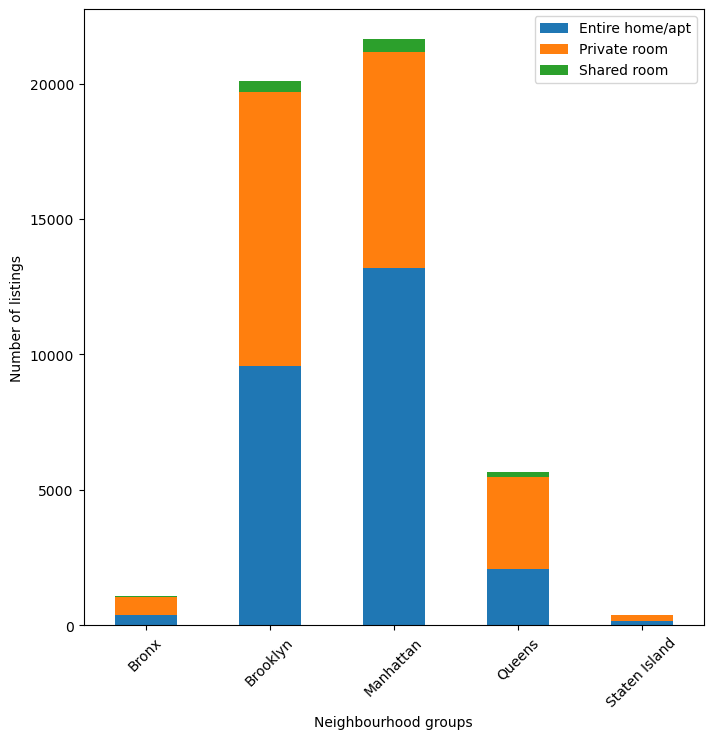

In [20]:
barplot2 = neighbourhood_group_room_type.plot.bar(stacked=True, rot=45, figsize=(8,8))
barplot2.set_ylabel("Number of listings")
barplot2.set_xlabel("Neighbourhood groups")
barplot2.legend(['Entire home/apt','Private room','Shared room'])

In [21]:
# #  What factors affect the price of an Airbnb listing?

In [22]:
nyc_airbnbs.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [23]:
nyc_airbnbs.groupby('room_type').price.mean()

room_type
Entire home/apt    211.794246
Private room        89.780973
Shared room         70.127586
Name: price, dtype: float64

Text(0.5, 1.0, '')

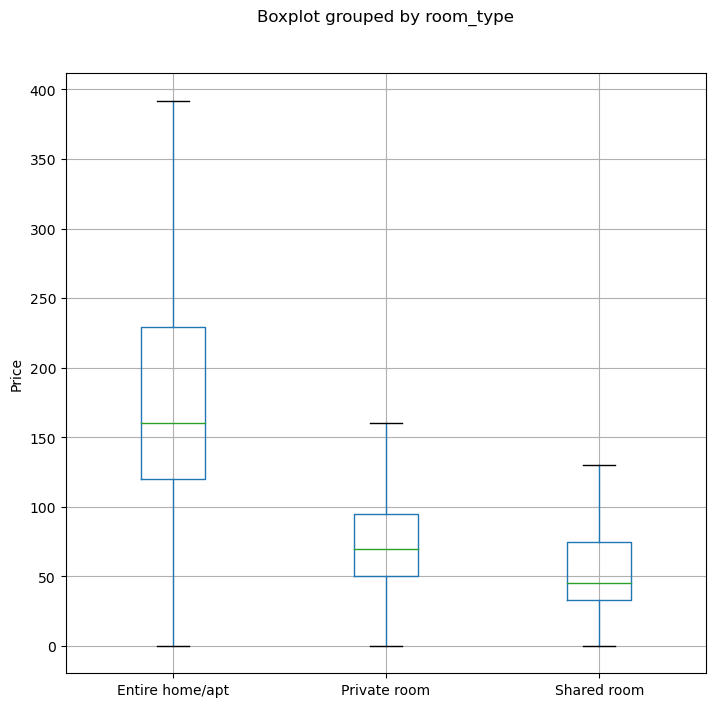

In [24]:
# Box plot for prices related with room _type
box_plot = nyc_airbnbs.boxplot(column='price',by='room_type', showfliers=False, figsize=(8,8))
box_plot.set_ylabel("Price")
box_plot.set_xlabel(None)
box_plot.set_title(None)

In [25]:
# Using [:10] for top 10 results 
TopHosts = nyc_airbnbs['host_name'].value_counts()[:10]
TopHosts

Michael         417
David           403
Sonder (NYC)    327
John            294
Alex            279
Blueground      232
Sarah           227
Daniel          226
Jessica         205
Maria           204
Name: host_name, dtype: int64

Text(0.5, 1.0, 'Top 10 hosts of listings in NYC')

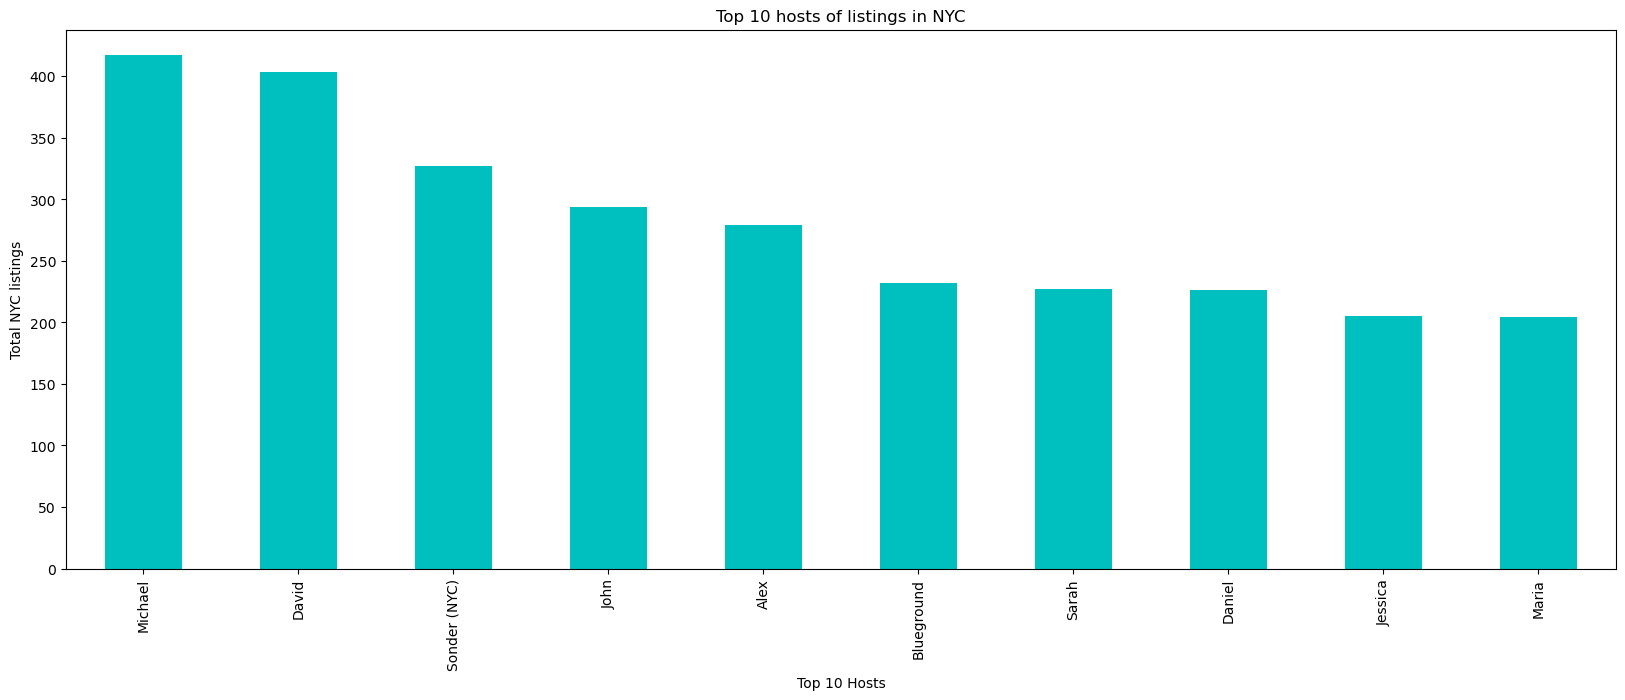

In [26]:
#Bar graph Representing the top hosts in New yYork city
TopHosts.plot(kind = 'bar', color = 'c', figsize = (20, 7))
plt.xlabel('Top 10 Hosts')
plt.ylabel('Total NYC listings')
plt.title('Top 10 hosts of listings in NYC')

In [27]:
#Calculating min and max threshold
MinThreshold,MaxThreshold = nyc_airbnbs.price.quantile([0.01,0.999])
MinThreshold,MaxThreshold

(30.0, 3000.0)

In [28]:
MinMax_df = nyc_airbnbs[(nyc_airbnbs.price > MinThreshold) & (nyc_airbnbs.price < MaxThreshold)]
MinMax_df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,0.00,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,0.00,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,0.00,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,0.00,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,0.00,6,2


In [29]:
# the highest average/day in each neighbourhood groups
Average = MinMax_df.groupby(['neighbourhood_group', 'neighbourhood'])['price'].mean().reset_index()
Average

,neighbourhood_group,neighbourhood,price
0,Bronx,Allerton,87.595238
1,Bronx,Baychester,75.428571
2,Bronx,Belmont,101.437500
3,Bronx,Bronxdale,58.888889
4,Bronx,Castle Hill,63.000000
...,...,...,...
216,Staten Island,Tottenville,144.857143
217,Staten Island,West Brighton,80.555556
218,Staten Island,Westerleigh,71.500000
219,Staten Island,Willowbrook,249.000000


In [32]:
TopGroup = Average.loc[Average.groupby('neighbourhood_group')['price'].idxmax()].sort_values(by='price', ascending=False)
TopGroup

,neighbourhood_group,neighbourhood,price
188,Staten Island,Fort Wadsworth,800.000000
88,Brooklyn,Sea Gate,487.857143
34,Bronx,Riverdale,442.090909
121,Manhattan,Tribeca,410.531429
163,Queens,Neponsit,274.666667


Text(0, 0.5, 'price')

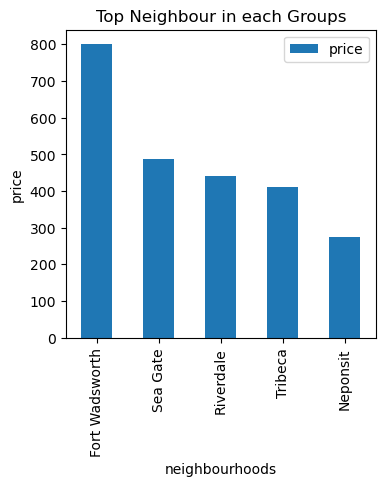

In [33]:
TopGroup.plot.bar(x = 'neighbourhood', rot = 90, title = 'Top Neighbour in each Groups', figsize = (4,4))
plt.xlabel('neighbourhoods')
plt.ylabel('price')

In [34]:
#Finfing most expensive Airbnb in NY
df_expensive = MinMax_df.loc[MinMax_df.groupby(['neighbourhood_group'])['price'].idxmax()][['name', 'neighbourhood_group', 'host_name', 'price']]
Expensive = df_expensive.sort_values(by='price', ascending=False)
Expensive

,name,neighbourhood_group,host_name,price
38498,"LUXURIOUS 5 bedroom, 4.5 bath home",Manhattan,Lisa,2999
29665,Park Place Townhouse by (Hidden by Airbnb),Brooklyn,Sally,2626
42680,Majestic Mansion LifeStyle :),Queens,Shah,2600
24477,"""The luxury of Comfort""",Bronx,Kathy,2500
45572,Central Hall Colonial with Free Parking Bus EX...,Staten Island,Anastasios,1250


Text(0.5, 1.0, 'Longitude & Latitude')

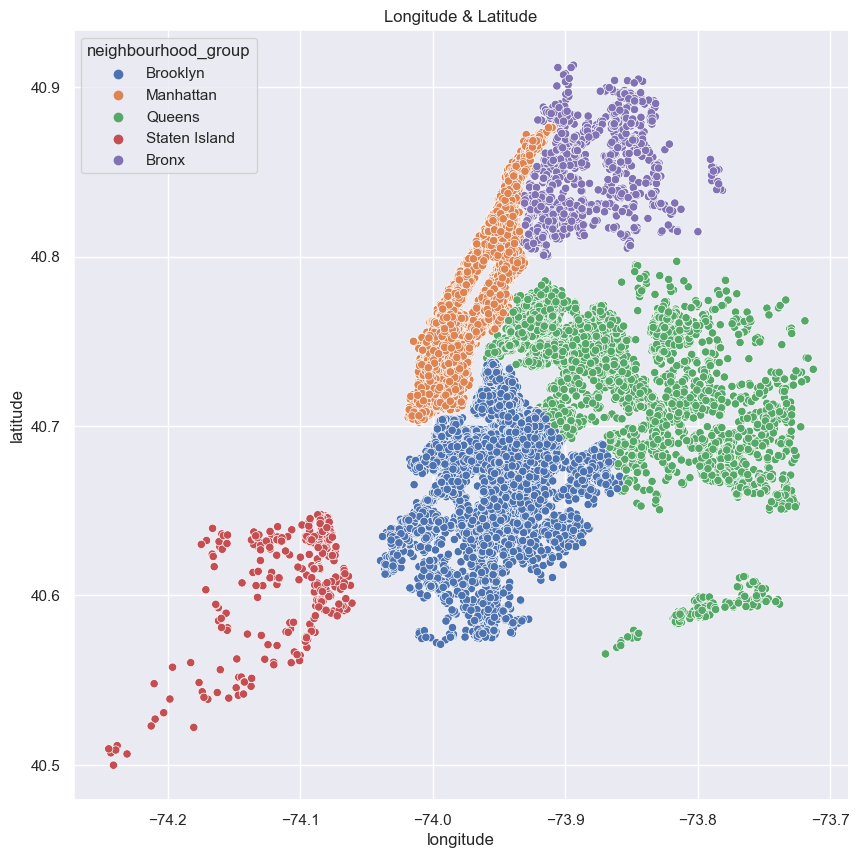

In [36]:
# checking where they belong on the map using longitude and latitudes
#Latitude and Longitudes Graph
sns.set(rc={'figure.figsize':(10,10)})
ScatterPlot = sns.scatterplot(data = MinMax_df, x = 'longitude', y = 'latitude', hue = 'neighbourhood_group')
ScatterPlot.set_title('Longitude & Latitude')